FIT5196 Assessment 1 task1

Student Name: Jiaming Ren

Student ID: 217218863

Date: 9/2/2021

Version: 2.0

Environment: Python 3.8.5 and Anaconda 4.10.3 (64-bit)

Libraries used:

- re (for regular expression, included in Anaconda Python 3.8)

- os (for file operation, included in Anaconda Python 3.8)

# Task 1 Instruction:
This assessment touches the very first step of analyzing textual data, i.e., extracting data
from semi-structured text files. 
Each
text file contains information about the tweets, i.e., “user name”, “user code”, “user
description”, “number of followers”, “whether or not the user account is verified”, “date
of the tweet”, and the “tweet text”. Your task is to extract the data from the text file and
transform the data into a XML format

1. Import Libraries

2. Load Data and Examining 

3. Extract data from text file 

    3.1. Find user name (tags: user_name,username,uname)
    
    3.2 Find usercode
    
    3.3 Find verfied_user (tags: verified?,verified_user?)
    
    3.4 Find no_follwers (tags: followerNo、No. followers)
    
    3.5 Find user_description (tags: udesc、userdescription、user_desc)
    
    3.6 Find tweet (tags: tweet、tweet_text)
    
    3.7 Find tweet_date
    
    3.8 examine
    
4. Transform the data into XML document

    4.1 Move all extracted data into a python dict
    
    4.2 write and output the xml file
5. Summary


# 1. Import Libraries

For this task, only the os and re are allowed to import

In [1]:
#import libraries
import os
import re

# 2. Load Data and Examining 

As the first step, the input text file will be loaded.

steps:
1. read the file
2. first encode all emoji in the text, then decode into bytes for a better manipulation of the data
3. strip all empty lines
4. examine the total length and print all lines to observe patterns

In [2]:
#load files
file = open('21290849_task1_input.txt','r',encoding='utf-8')
#read file
content = file.read()
#for regex convenience 
content = content+'$aresrsdfsadfwe.:'
#convert emoji into bytes and strip all empty line
content = content.encode('ascii', 'xmlcharrefreplace').decode('utf-8')
#inspect the contents in file
print('total length: ', len(content))

#dict for convert symbol
symbol = {'&': '&amp;', '"': '&quot;', '<':'&lt;', '>':'&gt;'}
#define regex
re_xml = r'[&<>"]'

xml_symbol = re.findall(re_xml,content)
if  len(xml_symbol) !=0 :
    
    xml_symbol = list(set(xml_symbol))
    #change symbol
    for i in range(len(xml_symbol)):
        content = content.replace(xml_symbol[i],symbol[xml_symbol[i]])

total length:  5166098


from the output, we can observe that all lines start with a $ and each tag end with '.:'. Also, some field can have different tags.

# 3. Extract data from text file
The task is to extract the data from the text file and transform the data into a XML format with the following elements:

The extract fields: 
1. user_name (tags: user_name,username,uname)
2. user_code 
3. verified_user (tags: verified?,verified_user?)
4. followerNo. (tags: followerNo、No. followers)
5. user_description (tags: udesc、userdescription、user_desc)
6. tweet (tags: tweet、tweet_text)
7. tweet_date

Steps to find each field: 
1. modify regex for each field
2. filter from file
3. examine output

#### 3.1 Find user name (tags: user_name,username,uname)
examples: 

- $uname.: Sameer Jha, 

- $username.: Lavidaeshermosa 🌈☀️👨‍👩‍👧‍👦🙏, 

- $user_name.: cynthy

In [3]:
#find all user name

#regex explanation
#always begin with (\$)
#thourgh inspection, there are three types of user_name tag (\$user_name\.: |\$username\.: |\$uname\.: )
#find all values (.*?)
#match next tag to make sure get all value of integrity of current finding tag ([\s\n]?\$[\w?\.]+\.:)

#modify regex
username = r'(\$user_name\.: |\$username\.: |\$uname\.: )(.*?)([\s\n]?\$[\w?\.]+\.:)'

#find all username lines
l_username = re.findall(username,content,re.DOTALL)

#### 3.2 Find usercode
example:

- $user_code.: 100005578

In [4]:
#find all usercode

#regex explanation
#the usercode always start with (\$user_code.: )
#find all values (.*?)
#match next tag to make sure get all value of integrity of current finding tag ([\s\n]?\$[\w?\.]+\.:)

#modify regex
usercode = r'(\$user_code\.: )(.*?)([\s\n]?\$[\w?\.]+\.:)'

#find all usercode lines
l_usercode = re.findall(usercode,content,re.DOTALL)

#### 3.3 Find verfied_user (tags: verified?,verified_user?)

examples:

- $verified_user?.: False

- $verified?.: False

In [5]:
#find all verfied_user

#regex explanation
#the verified_user has two tags (\$verified_user\?\.: |\$verified\?\.:)
#find all values (.*?)
#match next tag to make sure get all value of integrity of current finding tag ([\s\n]?\$[\w?\.]+\.:)

#modify regex
verfied_user = r'(\$verified_user\?\.: |\$verified\?\.:)(.*?)([\s\n]?\$[\w?\.]+\.:)'

#find all usercode lines
l_verfied_user = re.findall(verfied_user,content,re.DOTALL)

#### 3.4 Find no_follwers (tags: followerNo、No. followers)
examples:

- $No. followers.: 225.0

- $followerNo.: 221.0

In [6]:
#find all no_follwers

#regex explanation
#the no_follwers has two tags (\$followerNo\.: |\$No\.\s?followers\.: )
#find all values (.*?)
#match next tag to make sure get all value of integrity of current finding tag ([\s\n]?\$[\w?\.]+\.:)

#modify regex
no_follwers = r'(\$followerNo\.: |\$No\.\s?followers\.: )(.*?)([\s\n]?\$[\w?\.]+\.:)'

#find all usercode lines
l_no_follwers = re.findall(no_follwers,content,re.DOTALL)

#### 3.5 Find user_description (tags: udesc、userdescription、user_desc)
examples:

- $userdescription.: TattooKrazy Street Entrepreneur On The Road To Riches With My Bae https://t.co/DvPiY95b85 OF #MeetTheSharkxxx Booking karolinadg106@gmail.com 🔞

- $udesc.: Computer Engineering

- $user_desc.: #bitcoin since 2015


In [7]:
#find all user_description

#regex explanation
#the user_description has two tag (\$udesc\.: |\$userdescription\.: |\$user_desc\.: )
#find all values (.*?)
#match next tag to make sure get all value of integrity of current finding tag ([\s\n]?\$[\w?\.]+\.:)

#modify regex
user_description = r'(\$udesc\.: |\$userdescription\.: |\$user_desc\.: )(.*?)([\s\n]?\$[\w?\.]+\.:)'

#find all usercode lines
l_user_description = re.findall(user_description,content,re.DOTALL)

#### 3.6 Find tweet (tags: tweet、tweet_text)
examples:

- $tweet.: @CryptoCharles__ I got in at 55k and was told to let go around 63k range. Will I repeat the same after the finish of this half of the bull run.. possibly 🥲 #Bitcoin 

- $tweet_text.: #Bitcoin has two thresholds(TH): The higher TH is 69849$ and the lower TH is 53814$(buy). The important TH dates ar… https://t.co/7ePGhai2Xg

In [8]:
#find all tweet

#regex explanation
#the tweet has two tags (\$tweet\.: |\$tweet_text\.: )
#find all values (.*?)
#match next tag to make sure get all value of integrity of current finding tag ([\s\n]?\$[\w?\.]+\.:)

#modify regex
tweet = r'(\$tweet\.: |\$tweet_text\.: )(.*?)(\$[\w?\.]+\.:)'

#find all usercode lines
l_tweet = re.findall(tweet,content,re.DOTALL)

#### 3.7 Find tweet_date
example:

- $tweet_date.: 2021-07-04 10:45:23


In [9]:
#find all tweet_date

#regex explanation
#there is only one tag for tweet date (\$tweet_date\.: )
#find all values (.*?)
#match next tag to make sure get all value of integrity of current finding tag ([\s\n]?\$[\w?\.]+\.:)


#modify regex
tweet_date = r'(\$tweet_date\.: )(.*)'
#find all usercode lines
l_tweet_date = re.findall(tweet_date,content)

#### 3.8 examine
check whether the lengths for each field are consistent

In [10]:
#print out l_username length and first 5 username
print('1. l_username length: ',len(l_username),l_username[:5],'\n')

#print out l_usercode length and first 5 username
print('2. l_usercode length: ',len(l_usercode),l_usercode[0],'\n')

#print out l_verfied_user length and first 10 username
print('3. l_verfied_user length: ',len(l_verfied_user),l_verfied_user[0],'\n')

#print out l_no_follwers length and first 5 username
print('4. l_no_follwers length: ',len(l_no_follwers),l_no_follwers[0],'\n')

#print out l_user_description length and first 5 username
print('5. l_user_description length: ',len(l_user_description),l_user_description[0],'\n')

#print out l_tweet length and first 5 username
print('6. l_tweet length: ',len(l_tweet),l_tweet[0],'\n')

#print out l_tweet_date length and first 5 username
print('7. l_tweet_date length: ',len(l_tweet_date),l_tweet_date[0],'\n')

1. l_username length:  12339 [('$username.: ', 'kozy', '\n$user_code.:'), ('$username.: ', '&amp;#129472;CPT.HOEKCRYPTO&amp;#129472;', '\n$user_code.:'), ('$user_name.: ', 'Amony', '\n$user_code.:'), ('$uname.: ', 'BitcoinAverage - Cryptocurrency Exchange Rates', '\n$user_code.:'), ('$user_name.: ', 'Nhnhblack', '\n$user_code.:')] 

2. l_usercode length:  12339 ('$user_code.: ', '100042243', '\n$user_desc.:') 

3. l_verfied_user length:  12339 ('$verified?.:', ' False', ' $tweet_date.:') 

4. l_no_follwers length:  12339 ('$No. followers.: ', '22201.0', ' $verified?.:') 

5. l_user_description length:  12339 ('$user_desc.: ', 'A Variety Streamer Always On &amp;#9729;&amp;#65039; 9\n$No. followers.: 22201.0', ' $verified?.:') 

6. l_tweet length:  12339 ('$tweet_text.: ', "#bitcoin goes up slowly for three days and went back down to the same level in 12 hours. And there isn't even a reaction from the bulls.\n\nNot something we want to see in the short-term imo.\n", '$username.:') 

7. l

# 4. Transform the data into XML document

#### 4.1 Move all extracted data into a python dict
Now, I will encapsulate data extracted from file into a python dictionary to prepare for the next step which is out an XML file

steps: 

1. create an empty dict

2. we save all data into a list of tuples in a format [(tag, value)]. loop each list and assign the value to correct key in dict

3. a user can have multiple post, but the usercode is same. check if the user code exist. if the usercode exist, check posted date and change all to latest date data.

4. check the length of all keys

In [11]:
#{
#    user_code : {
#        user_name : .......
#        verified_user: .......
#        user_description: .......
#        no_followers: .......
#        tweets:[tweet]
#    }
#}

#the dict that store extracted data
data = {}

#loop each list and assign the value to correct key in dict
for i in range(len(l_tweet_date)):
    user_code = l_usercode[i][1]
    user_name = l_username[i][1]
    verified_user = l_verfied_user[i][1]
    user_description = l_user_description[i][1]
    no_followers = l_no_follwers[i][1]
    tweets = l_tweet[i][1]
    tweet_date = l_tweet_date[i][1]
    
    #check if the user code exist
    if user_code in data:
        temp_data = data[user_code]
        
        #record all tweets for each user
        temp_data['tweets'].append(tweets)
        
        #check posted date. if it is latest, change all to latest date data.
        if tweet_date > temp_data['tweet_date']:
            temp_data['user_name'] = user_name
            temp_data['verified_user'] = verified_user
            temp_data['user_description'] = user_description
            temp_data['no_followers'] = no_followers
            temp_data['tweet_date'] = tweet_date
            
    #if the usercode first time appear
    else:
        temp_data={}
        temp_data['user_name'] = user_name
        temp_data['verified_user'] = verified_user
        temp_data['user_description'] = user_description
        temp_data['no_followers'] = no_followers
        temp_data['tweet_date'] = tweet_date
        temp_data['tweets'] = [tweets]
        data[user_code]=temp_data
#check the length of all keys
print("length of all keys: ",len(data.keys()))   

length of all keys:  7506


#### 4.2 write and output the xml file
steps: 
1. open a xml file

2. write down each line

example: 
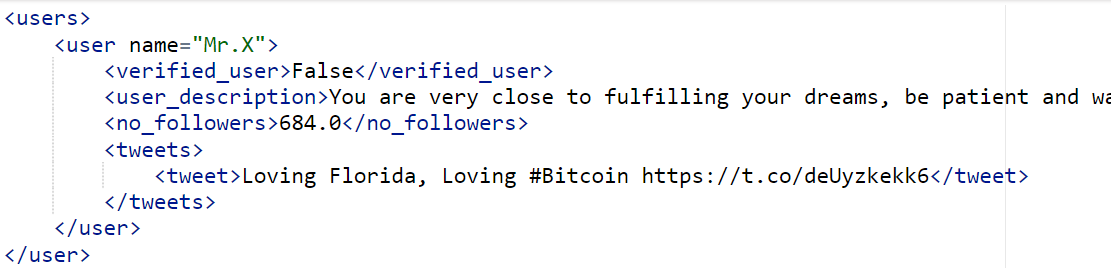

In [12]:
#open a xml file to store manipulated data
with open('217218863.xml','w',encoding='UTF-8') as output:
    #first line
    output.write('<?xml version="1.0" encoding="utf-8"?>')
    
    #user tag
    output.write('<users>')
    
    # write down each line
    for dict_data in data.values():
        output.write(f'<user name="{str(dict_data["user_name"])}">')
        output.write(f'<verified_user>{str(dict_data["verified_user"])}</verified_user>')
        output.write(f'<user_description>{str(dict_data["user_description"])}</user_description>')
        output.write(f'<no_followers>{str(dict_data["no_followers"])}</no_followers>')
        output.write('<tweets>')
        
        #write down each tweets
        for tweet in dict_data['tweets']:
            output.write(f'<tweet>{str(tweet)}</tweet>')
        output.write('</tweets>')
        output.write('</user>')
    #user tag closed
    output.write('</users>')
    #close file
    output.close()
    

# 5. Summary
This assessment measured the understanding of basic text file processing techniques in the Python programming language. The main outcomes achieved while applying these techniques were:


- TXT parsing and data extraction: by using the built-in function file.read() to read the file and use the library re to parsing data

- Exporting data to a specific format: by using the built-in functions like file.write() to build an XML by simulating its format.
